<a href="https://colab.research.google.com/github/GuilhermeRuy97/BootcampDataScience/blob/main/Analise_e_previsao_de_Series_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AULA 01 MOD 04/1
-Série Temporal

Séries temporais são uma série de observações feitas ao decorrer do tempo de forma sequencial (como por exemplo o valor do dólar).

In [10]:
import pandas as pd

url = "https://raw.githubusercontent.com/GuilhermeRuy97/BootcampDataScience/main/dados/dados_tuberculose_desde_2001.csv"

dados = pd.read_csv(url, encoding = "ISO-8859-1", sep = ";", skiprows = 3, skipfooter = 16,
                    thousands = ".", decimal = ",", engine = "python")

dados.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056


In [11]:
dados.tail()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
15,2016,7116,6800,8067,7360,7315,7527,6991,7702,7030,6588,7039,6672,86207
16,2017,7481,6803,8680,6780,8091,7394,7225,8110,7447,7809,7451,7020,90291
17,2018,7881,6821,7901,8121,7892,7720,8109,8934,7663,8701,7711,6900,94354
18,2019,8392,7754,7648,8274,8383,7363,8382,8239,8143,8592,7615,7220,96005
19,Total,142969,129386,149875,143199,143264,133444,141800,149952,140241,144870,136864,128893,1684757


In [12]:
#Podemos transformar os dados para não ser ano e coluna mês, mas sim uma características ano/mês

In [13]:
#Excluindo a coluna total
#O inplace substitui a alteração na variável original
#Lembre-se de que o inplace pode ser perigoso algumas vezes

dados.drop("Total", axis = 1, inplace = True)       #excluindo a coluna Total
dados.drop(19, axis = 0, inplace = True)            #excluindo a linha 19
dados.tail()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
14,2015,7111,6160,7833,6880,6893,6916,7531,7463,7189,7345,7287,6844
15,2016,7116,6800,8067,7360,7315,7527,6991,7702,7030,6588,7039,6672
16,2017,7481,6803,8680,6780,8091,7394,7225,8110,7447,7809,7451,7020
17,2018,7881,6821,7901,8121,7892,7720,8109,8934,7663,8701,7711,6900
18,2019,8392,7754,7648,8274,8383,7363,8382,8239,8143,8592,7615,7220


In [14]:
#dissolvendo os meses em uma unica coluna
#dados_st = dados série temporal

dados_st = dados.melt(id_vars = "Ano Diagnóstico", value_name = "Casos", var_name = "Mês")
dados_st

,Ano Diagnóstico,Mês,Casos
0,2001,Jan,8088
1,2002,Jan,8013
2,2003,Jan,8115
3,2004,Jan,7574
4,2005,Jan,7432
...,...,...,...
223,2015,Dez,6844
224,2016,Dez,6672
225,2017,Dez,7020
226,2018,Dez,6900


In [15]:
#Juntando as colunas ano e mes

dados_st["data"] = dados_st["Ano Diagnóstico"] + "-" + dados_st["Mês"]
dados_st

,Ano Diagnóstico,Mês,Casos,data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dez,6844,2015-Dez
224,2016,Dez,6672,2016-Dez
225,2017,Dez,7020,2017-Dez
226,2018,Dez,6900,2018-Dez


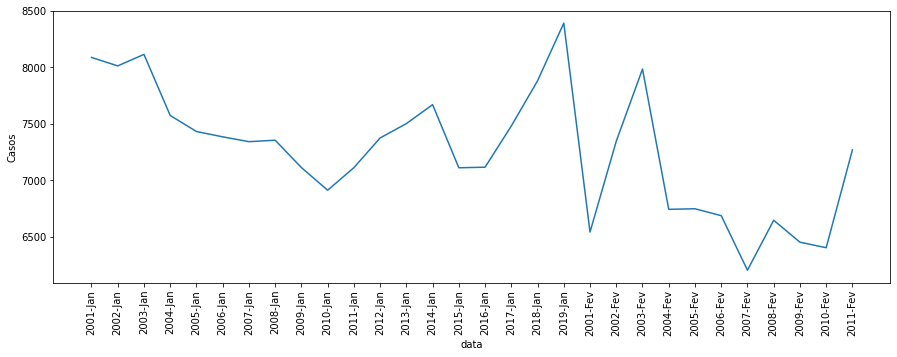

In [16]:
#Plotando as 30 primeiras linhas

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
sns.lineplot(data = dados_st[:30], x = "data", y = "Casos")
plt.xticks(rotation = 90)
plt.show()

#repare como as datas não estão bem organizadas pois está tratando a data como uma string

In [17]:
dados_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ano Diagnóstico  228 non-null    object
 1   Mês              228 non-null    object
 2   Casos            228 non-null    int64 
 3   data             228 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.2+ KB


# AULA 02 MOD 04/1
-Manipulação de datas

In [18]:
#Transformar a string em data
#Porém, a abreviação em inglês de Fevereiro é Feb e não Fev (repare que Jan é igual nas duas linguas)
#Então vamos renomear a coluna mês

meses_port_ing = {
    "Jan": "Jan",
    "Fev": "Feb",
    "Mar": "Mar",
    "Abr": "Apr",
    "Mai": "May",
    "Jun": "Jun",
    "Jul": "Jul",
    "Ago": "Aug",
    "Set": "Sep",
    "Out": "Oct",
    "Nov": "Nov",
    "Dez": "Dec"
}

dados_st["Mês"] = dados_st["Mês"].map(meses_port_ing)
dados_st.sample(5)

,Ano Diagnóstico,Mês,Casos,data
48,2011,Mar,7484,2011-Mar
188,2018,Oct,8701,2018-Out
95,2001,Jun,6805,2001-Jun
128,2015,Jul,7531,2015-Jul
111,2017,Jun,7394,2017-Jun


In [19]:
dados_st["data"] = dados_st["Ano Diagnóstico"]+"-"+dados_st["Mês"]
dados_st

,Ano Diagnóstico,Mês,Casos,data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dec,6844,2015-Dec
224,2016,Dec,6672,2016-Dec
225,2017,Dec,7020,2017-Dec
226,2018,Dec,6900,2018-Dec


In [20]:
#Tranformando em data

dados_st["Data"] = pd.to_datetime(dados_st["data"])
dados_st

,Ano Diagnóstico,Mês,Casos,data,Data
0,2001,Jan,8088,2001-Jan,2001-01-01
1,2002,Jan,8013,2002-Jan,2002-01-01
2,2003,Jan,8115,2003-Jan,2003-01-01
3,2004,Jan,7574,2004-Jan,2004-01-01
4,2005,Jan,7432,2005-Jan,2005-01-01
...,...,...,...,...,...
223,2015,Dec,6844,2015-Dec,2015-12-01
224,2016,Dec,6672,2016-Dec,2016-12-01
225,2017,Dec,7020,2017-Dec,2017-12-01
226,2018,Dec,6900,2018-Dec,2018-12-01


In [21]:
#Repare como agora temos a coluna data com o formato datetime

dados_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ano Diagnóstico  228 non-null    object        
 1   Mês              228 non-null    object        
 2   Casos            228 non-null    int64         
 3   data             228 non-null    object        
 4   Data             228 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 9.0+ KB


In [22]:
#Deixando somente as colunas Data e Casos

dados_st = dados_st[["Data", "Casos"]]
dados_st

#Chegando bem próximo de ser uma série temporal ano/mes

,Data,Casos
0,2001-01-01,8088
1,2002-01-01,8013
2,2003-01-01,8115
3,2004-01-01,7574
4,2005-01-01,7432
...,...,...
223,2015-12-01,6844
224,2016-12-01,6672
225,2017-12-01,7020
226,2018-12-01,6900


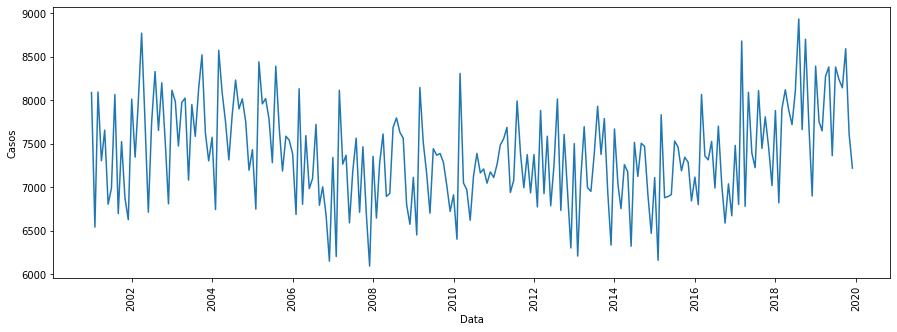

In [23]:
plt.figure(figsize=(15,5))
sns.lineplot(x = "Data", y = "Casos", data = dados_st)
plt.xticks(rotation = 90)
plt.show()

# AULA 03 MOD 04/1
-Tendências e médias móveis

In [24]:
#Antes de fazermos a média móvel precisamos fazer a ordenação dos dados
#Como após fazer o sort ele mantem o Index original, vamos resetar os índices
#Passamos o parâmetro "drop = True" para o reset_index para ele não criar uma nova coluna de índice

dados_st.sort_values(by = ["Data"], inplace = True)
dados_st.reset_index(drop = True, inplace = True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


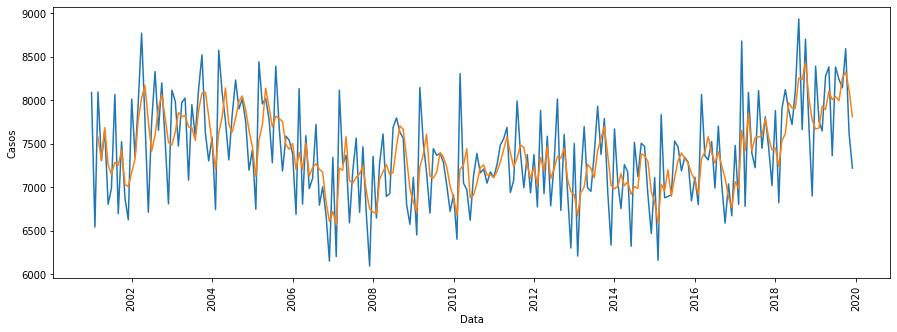

In [25]:
#Calculando as médias móveis dos dados para verificar a tendência de uma série amostral
#O rolling considera uma janela de tempo, ex. a cada 3 meses
#Fazemos a média dos 3 úiltimos valores

dados_st["Media_Movel_3"] = dados_st["Casos"].rolling(3).mean()

plt.figure(figsize=(15,5))
sns.lineplot(x = "Data", y = "Casos", data = dados_st)
sns.lineplot(x = "Data", y = "Media_Movel_3", data = dados_st)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


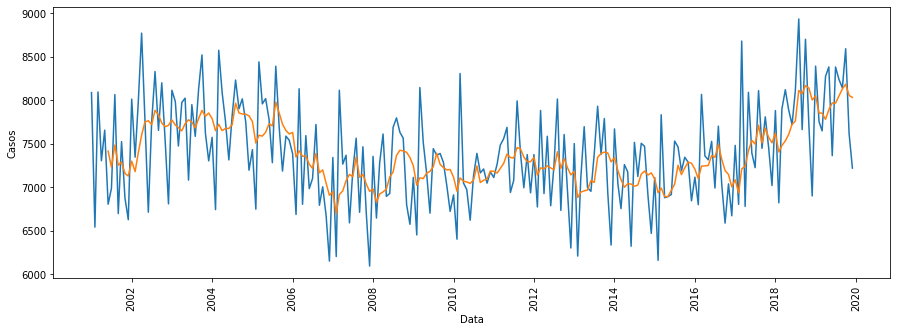

In [26]:
#Criando uma nova janela mas com uma média móvel com intervalo maior

dados_st["Media_Movel_6"] = dados_st["Casos"].rolling(6).mean()

plt.figure(figsize=(15,5))
sns.lineplot(x = "Data", y = "Casos", data = dados_st)
sns.lineplot(x = "Data", y = "Media_Movel_6", data = dados_st)
plt.xticks(rotation = 90)
plt.show()

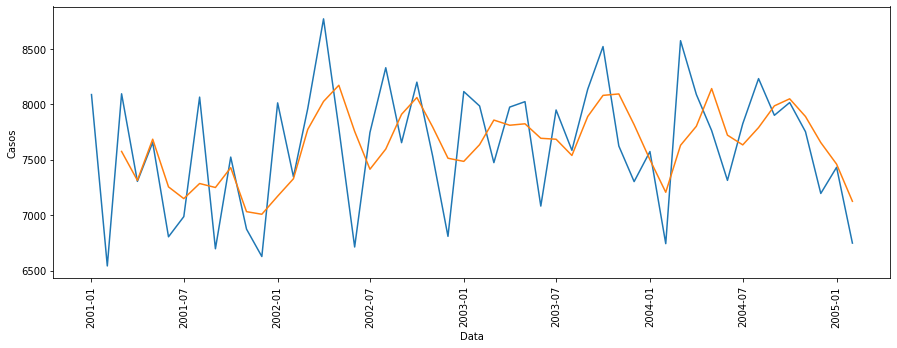

In [27]:
#Plotando os 50 primeiros elementos dos gráficos

plt.figure(figsize=(15,5))
sns.lineplot(x = "Data", y = "Casos", data = dados_st[:50])
sns.lineplot(x = "Data", y = "Media_Movel_3", data = dados_st[:50])
plt.xticks(rotation = 90)
plt.show()

#repare que a média móvel parece estar um pouco atrasada em relação aos picos do gráfico original

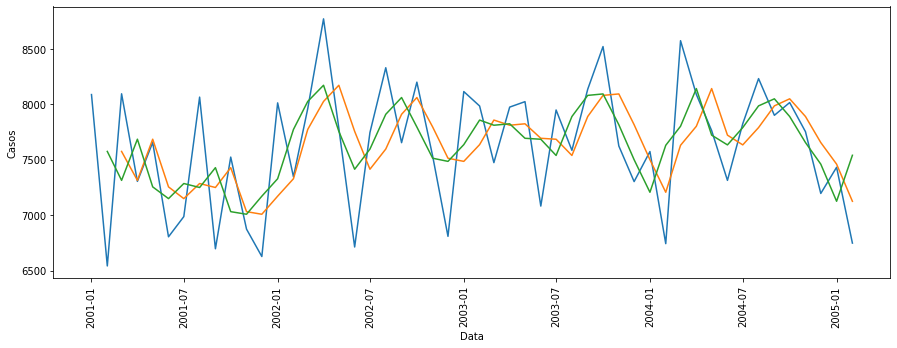

In [28]:
#Passamos então o parâmetro center para a media movel acompanhar os picos da serie temporal

dados_st["Media_Movel_3_centrada"] = dados_st["Casos"].rolling(3, center = True).mean()
plt.figure(figsize=(15,5))
sns.lineplot(x = "Data", y = "Casos", data = dados_st[:50])
sns.lineplot(x = "Data", y = "Media_Movel_3", data = dados_st[:50])
sns.lineplot(x = "Data", y = "Media_Movel_3_centrada", data = dados_st[:50])
plt.xticks(rotation = 90)
plt.show()

# AULA 04 MOD 04/1
-Decomposição e Autocorrelação

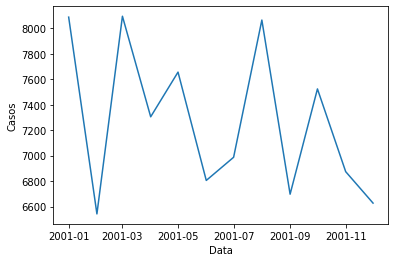

In [29]:
#Comparando ano a ano da série temporal (períodos específicos da série temporal)
#Começamos com um slice da série temporal

sns.lineplot(x = "Data", y = "Casos", data = dados_st[:12])

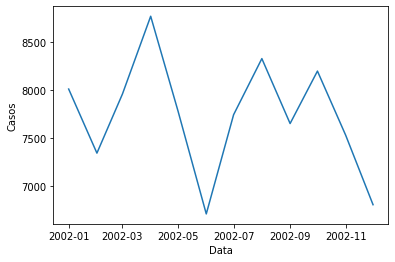

In [32]:
#PLotando o segundo ano, por exemplo

sns.lineplot(x = "Data", y = "Casos", data = dados_st[12:24])

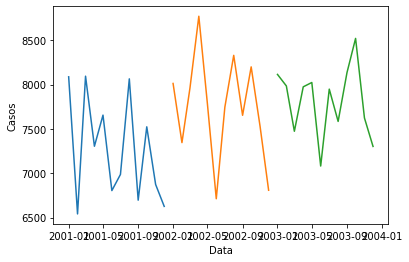

In [33]:
#Porém isso fica inviável ao analisar muitos anos ("fazer na mão" de 12 em 12 os slices dos anos), pois
#os gráficos não ficam sobrepostos já que estamos utilizando a Data no eixo X

sns.lineplot(x = "Data", y = "Casos", data = dados_st[0:12])
sns.lineplot(x = "Data", y = "Casos", data = dados_st[12:24])
sns.lineplot(x = "Data", y = "Casos", data = dados_st[24:36])

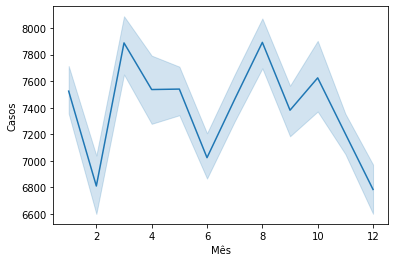

In [35]:
#Manipulando as datas da série usando o .dt
#O .month retornaria os meses

dados_st["Ano"] = dados_st["Data"].dt.year
dados_st["Mês"] = dados_st["Data"].dt.month

sns.lineplot(data = dados_st, x = "Mês", y = "Casos")

#repare como é criado o intervalo de confiança em vez de "linha a linha"

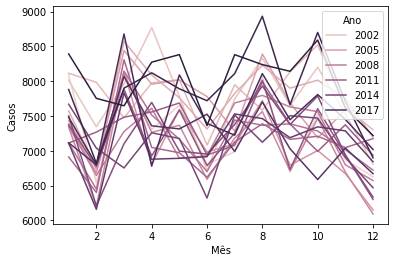

In [36]:
#Para separar as linhas passamos o parâmetro de tonalidade "hue"

dados_st["Ano"] = dados_st["Data"].dt.year
dados_st["Mês"] = dados_st["Data"].dt.month

sns.lineplot(data = dados_st, x = "Mês", y = "Casos", hue = "Ano")

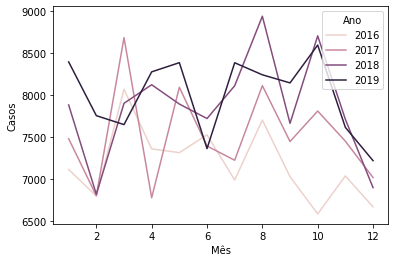

In [37]:
#Escolhendo quais meses se quer com uma query dos anos

dados_st["Ano"] = dados_st["Data"].dt.year
dados_st["Mês"] = dados_st["Data"].dt.month

sns.lineplot(data = dados_st.query("Ano in [2019, 2018, 2017, 2016]"), x = "Mês", y = "Casos", hue = "Ano")

In [39]:
#Fazendo a decomposição da série temporal
#Precisamos setar a Data como índice

from statsmodels.tsa.seasonal import seasonal_decompose

decomposicao = seasonal_decompose(dados_st[["Data", "Casos"]].set_index("Data"))

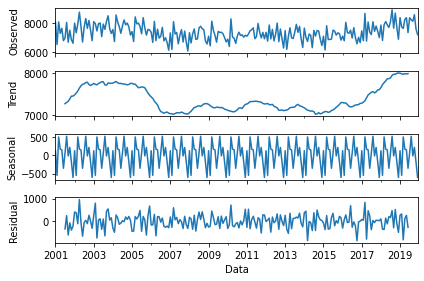

In [40]:
decomposicao.plot();

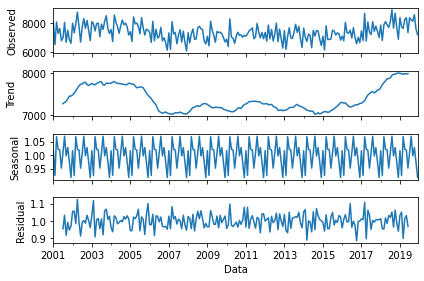

In [43]:
#o decompose vem com um model = "additive" por padrão, podemos mudar para "multiplicative" por exemplo
#A tendência e sazonalidade são combinadas e resultam na observada
#O resíduo ainda está alto, isso deve deve por ser uma base de dados muito específica (tuberculose)

decomposicao = seasonal_decompose(dados_st[["Data", "Casos"]].set_index("Data"), model = "multiplicative")
decomposicao.plot();

#repare que apesar dos comportamentos semelhantes, as unidades do eixo Y estão diferentes, com resíduos menores (explicação melhor)


##Decomposição de séries temporais

In [45]:
#Importando uma base de dados sobre passageiros de uma cia aérea ao longo dos anos
#Uma base de dados famosa na literatura

url_passageiros = "https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/AirPassengers.csv"
dados_passageiros = pd.read_csv(url_passageiros)

In [46]:
dados_passageiros.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [47]:
dados_passageiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [48]:
#Modificando a coluna Month para data

dados_passageiros["Month"] = pd.to_datetime(dados_passageiros["Month"])

dados_passageiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


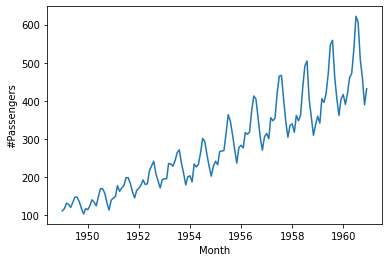

In [49]:
sns.lineplot( x = "Month", y = "#Passengers", data = dados_passageiros)

#Repare como neste dataset é possível reparar uma sazonalidade em períodos

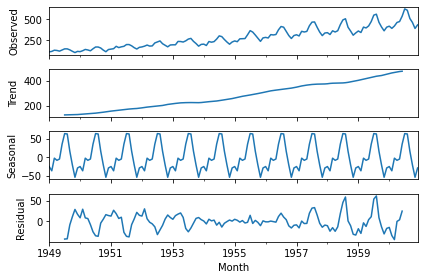

In [51]:
#Fazendo a decomposição dos passageiros (p)

decomposicao_p = seasonal_decompose(dados_passageiros.set_index("Month"))
decomposicao_p.plot();

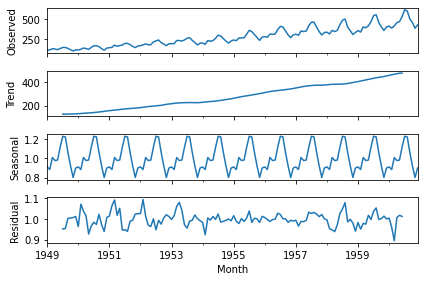

In [52]:
decomposicao_p = seasonal_decompose(dados_passageiros.set_index("Month"), model = "multiplicative")
decomposicao_p.plot();

## Autocorrelação e Autocorrelação Parcial

In [53]:
#Podem existir gráficos onde as variáveis não tem relação, como por exemplo,
#o consumo de margarina e o número de divórcios (mais exemplos: https://www.tylervigen.com/spurious-correlations)
#Neste caso, correlação não resulta em causalidade

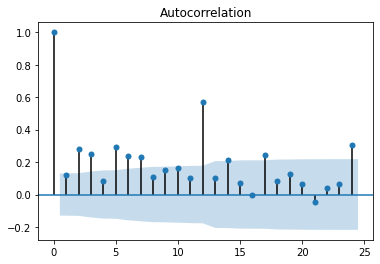

In [57]:
#Podemos fazer a correlação da série com ela mesma, chamamos isto de autocorrelação

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(dados_st["Casos"]);

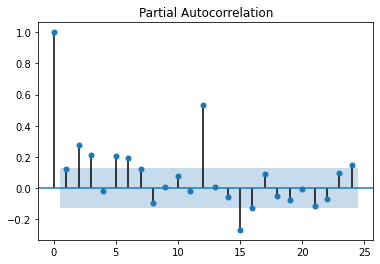

In [58]:
#Plotando a autocorrelação parcial (normalizada de lag 1)

plot_pacf(dados_st["Casos"]);

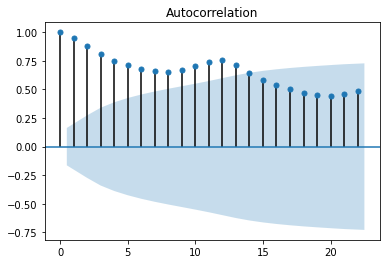

In [59]:
plot_acf(dados_passageiros["#Passengers"]);

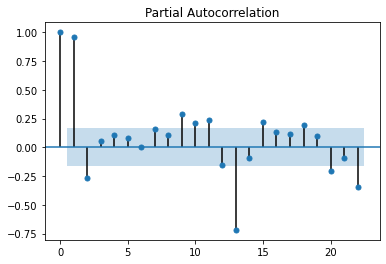

In [61]:
plot_pacf(dados_passageiros["#Passengers"]);

# AULA 05 MOD 04/1
-Previsões em Séries Temporais (ARIMA)

In [62]:
#Relembrando os dados do passageiros

dados_passageiros

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [70]:
#Trocando o nome da coluna Month por Data e #Passengers por Passageiros

dados_passageiros.rename({"Month": "Data", "#Passengers": "Passageiros"}, axis=1, inplace = True)

dados_passageiros["Mês"] = dados_passageiros["Data"].dt.month

dados_passageiros

,Data,Passageiros,Mês
0,1949-01-01,112,1
1,1949-02-01,118,2
2,1949-03-01,132,3
3,1949-04-01,129,4
4,1949-05-01,121,5
...,...,...,...
139,1960-08-01,606,8
140,1960-09-01,508,9
141,1960-10-01,461,10
142,1960-11-01,390,11


In [71]:
#Criando a coluna Ano

dados_passageiros["Ano"] = dados_passageiros["Data"].dt.year

dados_passageiros

,Data,Passageiros,Mês,Ano
0,1949-01-01,112,1,1949
1,1949-02-01,118,2,1949
2,1949-03-01,132,3,1949
3,1949-04-01,129,4,1949
4,1949-05-01,121,5,1949
...,...,...,...,...
139,1960-08-01,606,8,1960
140,1960-09-01,508,9,1960
141,1960-10-01,461,10,1960
142,1960-11-01,390,11,1960


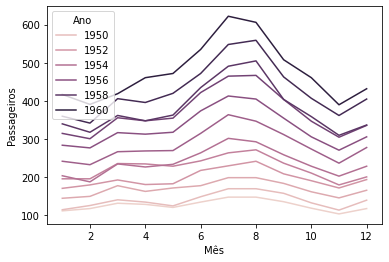

In [74]:
sns.lineplot(data = dados_passageiros, x = "Mês", y = "Passageiros", hue = "Ano")

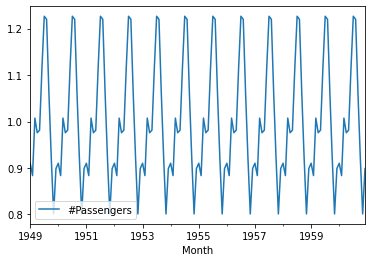

In [78]:
#Pegando os dados de sazonalidade da decomposição

decomposicao_p.seasonal.plot()

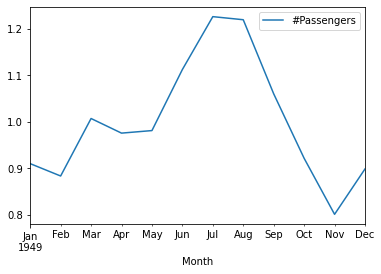

In [79]:
#Fazendo um slice para fazer para 12 meses

decomposicao_p.seasonal[:12].plot()

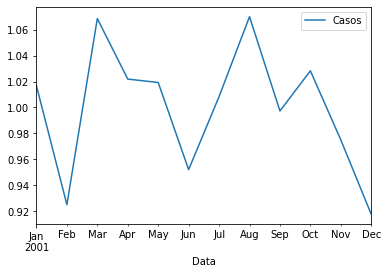

In [82]:
#Fazendo o seasonal dos casos de tuberculose

decomposicao.seasonal[:12].plot()

##Previsões com ARIMA

In [ ]:
#Modelo autoregressivo integral com médias móveis
#Combina os modelos autoregressivos e de médias móveis

In [84]:
#O order é o (p,d,q), passamos como [0,0,0] por enquanto
#Passamos o tipo dos dados como float32

from statsmodels.tsa.arima_model import ARIMA

modelo_arima = ARIMA(dados_st["Casos"].values.astype("float32"), order = [0, 0, 0])
modelo_arima_treinado = modelo_arima.fit()

In [85]:
#Passamos quantos passos queremos prever para o forecast, por exemplo, 12 meses

modelo_arima_treinado.forecast(12)

(array([7389.2850867, 7389.2850867, 7389.2850867, 7389.2850867,
        7389.2850867, 7389.2850867, 7389.2850867, 7389.2850867,
        7389.2850867, 7389.2850867, 7389.2850867, 7389.2850867]),
 array([567.21170306, 567.21170306, 567.21170306, 567.21170306,
        567.21170306, 567.21170306, 567.21170306, 567.21170306,
        567.21170306, 567.21170306, 567.21170306, 567.21170306]),
 array([[6277.57057709, 8500.99959632],
        [6277.57057709, 8500.99959632],
        [6277.57057709, 8500.99959632],
        [6277.57057709, 8500.99959632],
        [6277.57057709, 8500.99959632],
        [6277.57057709, 8500.99959632],
        [6277.57057709, 8500.99959632],
        [6277.57057709, 8500.99959632],
        [6277.57057709, 8500.99959632],
        [6277.57057709, 8500.99959632],
        [6277.57057709, 8500.99959632],
        [6277.57057709, 8500.99959632]]))

In [86]:
#Para pegar as previsões, buscaremos pelo primeiro array

modelo_arima_treinado.forecast(12)[0]

array([7389.2850867, 7389.2850867, 7389.2850867, 7389.2850867,
       7389.2850867, 7389.2850867, 7389.2850867, 7389.2850867,
       7389.2850867, 7389.2850867, 7389.2850867, 7389.2850867])

In [90]:
#Utilizando dados de treino

dados_treino = dados_st.query("Ano != 2019")
dados_teste = dados_st.query("Ano == 2019")

modelo_arima = ARIMA(dados_treino["Casos"].values.astype("float32"), order = [0, 0, 0])
modelo_arima_treinado = modelo_arima.fit()

In [92]:
#Para fazer a previsão não usamos os dados de teste

previsao = modelo_arima_treinado.forecast(12)[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


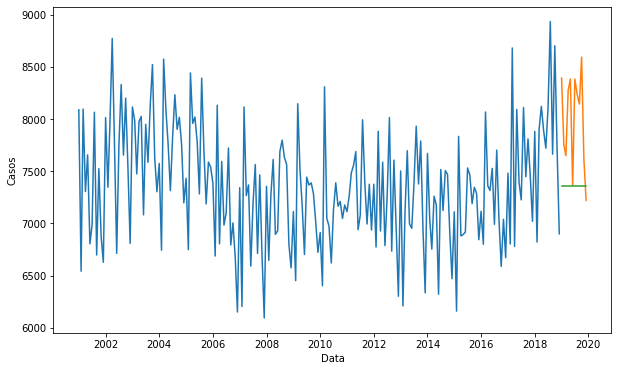

In [96]:
#Comparando os dados de teste e dados de treino

dados_teste["previsao"] = previsao
plt.figure(figsize=(10,6))
sns.lineplot(x = "Data", y = "Casos", data = dados_treino)
sns.lineplot(x = "Data", y = "Casos", data = dados_teste)
sns.lineplot(x = "Data", y = "previsao", data = dados_teste)

#Repare no ano previsto em laranja